In [58]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [59]:
df = pd.DataFrame()

In [60]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [61]:
df.head()

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0


In [62]:
import seaborn as sns

<AxesSubplot:xlabel='X1', ylabel='X2'>

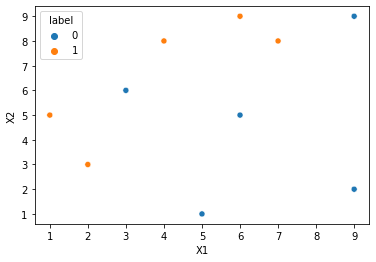

In [63]:
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [64]:
df['weights']=1/df.shape[0]

In [65]:
df.head()

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1


In [66]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=1)

In [67]:
X=df.iloc[:,0:2]
y=df.label

In [68]:
X

,X1,X2
0,1,5
1,2,3
2,3,6
3,4,8
4,5,1
5,6,9
6,6,5
7,7,8
8,9,9
9,9,2


In [69]:
y

0    1
1    1
2    0
3    1
4    0
5    1
6    0
7    1
8    0
9    0
Name: label, dtype: int64

In [70]:
dt.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(167.4, 163.07999999999998, 'X[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

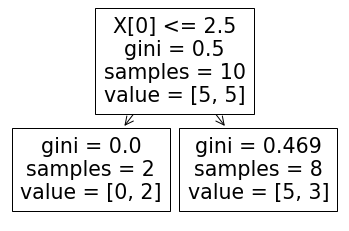

In [71]:
from sklearn.tree import plot_tree
plot_tree(dt)

In [72]:
df['y_pred']=dt.predict(X)

In [73]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [74]:
err=0

for i in range(df.shape[0]):
    if df.iloc[i,2] == df.iloc[i,4]:
        continue
    else:
        err=round(err+df.iloc[i,3],2)

In [75]:
err

0.3

In [76]:
def calculate_model_weight(err):
    return 1/2*np.log((1-err)/err)

In [77]:
alpha1=calculate_model_weight(err)
alpha1

0.42364893019360184

In [78]:
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [79]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [80]:
df['updated_row_weights']=df.apply(update_row_weights,axis=1)

In [81]:
df

,X1,X2,label,weights,y_pred,updated_row_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [83]:
df['updated_row_weights'].sum()

0.9165153319682015

In [84]:
df['normalized_weight']=df['updated_row_weights']/df['updated_row_weights'].sum()

In [85]:
df

,X1,X2,label,weights,y_pred,updated_row_weights,normalized_weight
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [86]:
df['normalized_weight'].sum()

1.0

In [89]:
df['upper_limit']=np.cumsum(df['normalized_weight'])

In [90]:
df

,X1,X2,label,weights,y_pred,updated_row_weights,normalized_weight,upped_limit,upper_limit
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.142950
2,3,6,0,0.1,0,0.065508,0.071475,0.214425,0.214425
3,4,8,1,0.1,0,0.152653,0.166559,0.380983,0.380983
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.452458
5,6,9,1,0.1,0,0.152653,0.166559,0.619017,0.619017
6,6,5,0,0.1,0,0.065508,0.071475,0.690492,0.690492
7,7,8,1,0.1,0,0.152653,0.166559,0.857050,0.857050
8,9,9,0,0.1,0,0.065508,0.071475,0.928525,0.928525
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,1.000000


In [91]:
df['lower_limit']=df['upper_limit']-df['normalized_weight']

In [92]:
df

,X1,X2,label,weights,y_pred,updated_row_weights,normalized_weight,upped_limit,upper_limit,lower_limit
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.142950,0.071475
2,3,6,0,0.1,0,0.065508,0.071475,0.214425,0.214425,0.142950
3,4,8,1,0.1,0,0.152653,0.166559,0.380983,0.380983,0.214425
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.452458,0.380983
5,6,9,1,0.1,0,0.152653,0.166559,0.619017,0.619017,0.452458
6,6,5,0,0.1,0,0.065508,0.071475,0.690492,0.690492,0.619017
7,7,8,1,0.1,0,0.152653,0.166559,0.857050,0.857050,0.690492
8,9,9,0,0.1,0,0.065508,0.071475,0.928525,0.928525,0.857050
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,1.000000,0.928525


In [93]:
df.drop(['upped_limit'],axis=1)

,X1,X2,label,weights,y_pred,updated_row_weights,normalized_weight,upper_limit,lower_limit
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,0,0.065508,0.071475,0.214425,0.142950
3,4,8,1,0.1,0,0.152653,0.166559,0.380983,0.214425
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,0,0.152653,0.166559,0.619017,0.452458
6,6,5,0,0.1,0,0.065508,0.071475,0.690492,0.619017
7,7,8,1,0.1,0,0.152653,0.166559,0.857050,0.690492
8,9,9,0,0.1,0,0.065508,0.071475,0.928525,0.857050
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [114]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['upper_limit'] > a and a > row['lower_limit']:
        indices.append(index)
  return indices                

In [115]:
index_values=create_new_dataset(df)

In [116]:
index_values

[6, 3, 2, 6, 7, 0, 2, 6, 9, 1]

In [ ]:
second_df=